lets train a FFNN for a regression problem

In [1]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('cardio_dataset.csv')
df

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_01,RISK
0,1,48,236,66,0,1,0,1.1
1,0,48,260,51,0,1,1,7.0
2,0,44,187,49,1,1,0,7.0
3,1,42,216,57,1,1,0,0.4
4,1,56,156,42,0,1,0,2.2
...,...,...,...,...,...,...,...,...
6639,1,65,307,42,1,0,1,36.6
6640,1,42,169,56,0,0,0,0.8
6641,0,65,212,35,1,0,0,30.6
6642,0,66,184,39,0,0,0,23.8


In [3]:
dataset=df.values

data=dataset[:,0:7]
target=dataset[:,7]

In [4]:
print(target)

[ 1.1  7.   7.  ... 30.6 23.8  1. ]


In [5]:
print(data.shape)
print(target.shape)

(6644, 7)
(6644,)


In [6]:
target=np.reshape(target,(-1,1))

In [7]:
print(target.shape)
print(target)

(6644, 1)
[[ 1.1]
 [ 7. ]
 [ 7. ]
 ...
 [30.6]
 [23.8]
 [ 1. ]]


In [8]:
from sklearn.preprocessing import MinMaxScaler

target=np.reshape(target, (-1,1))

scaler_data = MinMaxScaler()
scaler_target = MinMaxScaler()

#scaler_data.fit(data)
#data_scaled=scaler_data.transform(data)

#scaler_target.fit(target)

data_scaled=scaler_data.fit_transform(data)
target_scaled=scaler_target.fit_transform(target)

In [9]:
print(data[:10])

[[  1.  48. 236.  66.   0.   1.   0.]
 [  0.  48. 260.  51.   0.   1.   1.]
 [  0.  44. 187.  49.   1.   1.   0.]
 [  1.  42. 216.  57.   1.   1.   0.]
 [  1.  56. 156.  42.   0.   1.   0.]
 [  0.  44. 162.  57.   1.   1.   0.]
 [  0.  50. 244.  47.   0.   1.   0.]
 [  0.  48. 212.  30.   1.   1.   0.]
 [  1.  66. 202.  53.   0.   1.   1.]
 [  0.  63. 186.  46.   1.   1.   0.]]


In [10]:
print(data_scaled[:10])

[[1.         0.20512821 0.40045249 0.29347826 0.         1.
  0.        ]
 [0.         0.20512821 0.45475113 0.21195652 0.         1.
  1.        ]
 [0.         0.1025641  0.28959276 0.20108696 1.         1.
  0.        ]
 [1.         0.05128205 0.35520362 0.24456522 1.         1.
  0.        ]
 [1.         0.41025641 0.21945701 0.16304348 0.         1.
  0.        ]
 [0.         0.1025641  0.23303167 0.24456522 1.         1.
  0.        ]
 [0.         0.25641026 0.41855204 0.19021739 0.         1.
  0.        ]
 [0.         0.20512821 0.34615385 0.09782609 1.         1.
  0.        ]
 [1.         0.66666667 0.32352941 0.22282609 0.         1.
  1.        ]
 [0.         0.58974359 0.28733032 0.18478261 1.         1.
  0.        ]]


In [11]:
target[:10]

array([[ 1.1],
       [ 7. ],
       [ 7. ],
       [ 0.4],
       [ 2.2],
       [ 3. ],
       [ 4.2],
       [17.4],
       [13.4],
       [17.3]])

In [12]:
target_scaled[:10]

array([[0.01172333],
       [0.08089097],
       [0.08089097],
       [0.003517  ],
       [0.02461899],
       [0.03399766],
       [0.04806565],
       [0.2028136 ],
       [0.15592028],
       [0.20164127]])

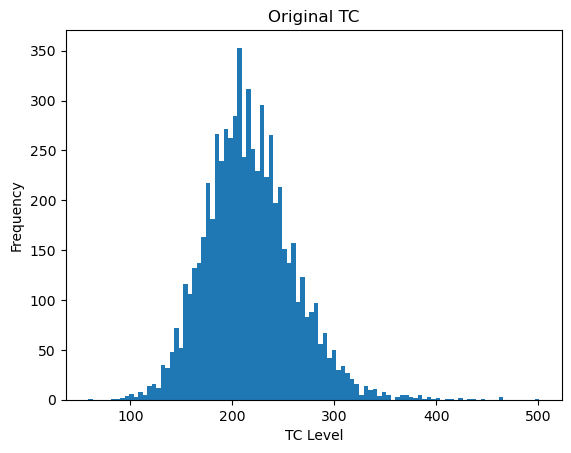

In [13]:
plt.hist(data[:,2],bins=100)
plt.title('Original TC')
plt.xlabel('TC Level')
plt.ylabel('Frequency')
plt.show()

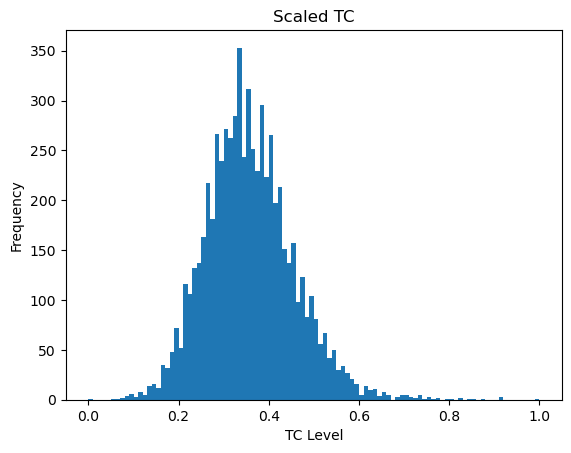

In [14]:
plt.hist(data_scaled[:,2],bins=100)
plt.title('Scaled TC')
plt.xlabel('TC Level')
plt.ylabel('Frequency')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data_scaled, target_scaled,test_size=0.1)

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np

model = Sequential()
model.add(Dense(128, input_dim=7, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['mae'])

model.summary()

c:\Users\nadun\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,941 (38.83 KB)

 Trainable params: 9,941 (38.83 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.2)

Epoch 1/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0371 - mae: 0.1332 - val_loss: 0.0192 - val_mae: 0.0981
Epoch 2/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0179 - mae: 0.0982 - val_loss: 0.0146 - val_mae: 0.0905
Epoch 3/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0160 - mae: 0.0916 - val_loss: 0.0139 - val_mae: 0.0888
Epoch 4/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0149 - mae: 0.0884 - val_loss: 0.0116 - val_mae: 0.0826
Epoch 5/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137 - mae: 0.0841 - val_loss: 0.0110 - val_mae: 0.0780
Epoch 6/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0130 - mae: 0.0806 - val_loss: 0.0089 - val_mae: 0.0671
Epoch 7/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0117 - mae: 0.0762 - val_loss: 0.0082 - val_mae: 0.0657
Epoch 8/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0117 - mae: 0.0744 - val_loss: 0.0067 - val_mae: 0.0578
Epoch 9/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

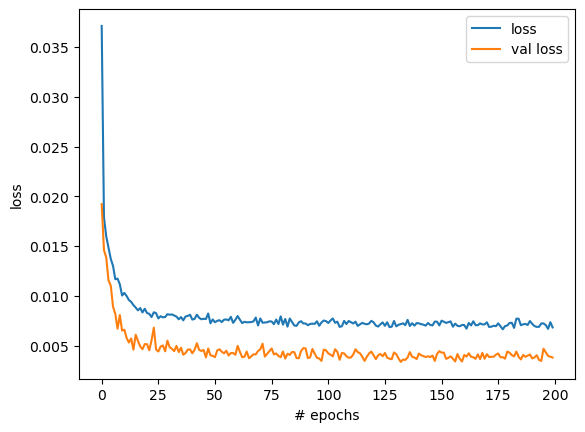

In [20]:
plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

In [21]:
from sklearn.metrics import r2_score

predicted_result=model.predict(test_data)

r2=r2_score(test_target,predicted_result)
print('r2 score:',r2)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
r2 score: 0.813472880301073


In [22]:
print('actual:',test_target[:10].T)
print('predicted:',predicted_result[:10].T)

actual: [[0.24032825 0.07620164 0.06682298 0.08323564 0.01875733 0.8898007
  0.24384525 0.04220399 0.03868699 0.04923798]]
predicted: [[0.15924242 0.0864774  0.06612337 0.08129571 0.05750266 0.48020628
  0.1927364  0.08821715 0.06534629 0.07243285]]


In [23]:
print('actual inverse scaled:',scaler_target.inverse_transform(test_target[:10]).T)
print('predicted inverse scaled:',scaler_target.inverse_transform(predicted_result[:10]).T)

actual inverse scaled: [[20.6  6.6  5.8  7.2  1.7 76.  20.9  3.7  3.4  4.3]]
predicted inverse scaled: [[13.683378   7.4765224  5.740323   7.034524   5.0049767 41.061596
  16.540415   7.624923   5.674039   6.278522 ]]


In [24]:
test_data=np.array([0,63,186,46,1,1,0]).reshape(1,-1)

In [25]:
scaled_test_data=scaler_data.transform(test_data)
print(scaled_test_data)

[[0.         0.58974359 0.28733032 0.18478261 1.         1.
  0.        ]]


In [26]:
result=model.predict(scaled_test_data)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.20102343]]


In [27]:
scaler_target.inverse_transform(result)

array([[17.2473]], dtype=float32)

In [28]:
my_test_data=[1,56,156,42,0,1,0]

my_test_data=scaler_data.transform([my_test_data])

result=model.predict(my_test_data)
print('result:',result)

predicted=scaler_target.inverse_transform(result)
print('Predicted Result:',predicted)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
result: [[0.06308545]]
Predicted Result: [[5.4811893]]
